### **1.Install Dependencies and Setup**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 578.0 MB 16 kB/s 
     |████████████████████████████████| 511.8 MB 9.5 kB/s 
     |████████████████████████████████| 511.7 MB 6.7 kB/s 
     |████████████████████████████████| 511.7 MB 5.1 kB/s 
     |████████████████████████████████| 497.9 MB 37 kB/s 


In [3]:
!pip list

Package                       Version
----------------------------- ----------------------------
absl-py                       1.2.0
aeppl                         0.0.33
aesara                        2.7.9
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
albumentations                1.2.1
altair                        4.2.0
appdirs                       1.4.4
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
asynctest                     0.13.0
atari-py                      0.2.9
atomicwrites                  1.4.1
attrs                         22.1.0
audioread                     3.0.0
autograd                      1.4
Babel                         2.10.3
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.1
blis                          0.7.8

In [4]:
import tensorflow as tf
import os

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
tf.config.list_physical_devices('GPU')

[]

### **2.Remove** **doggy** **images**

In [7]:
import cv2  #import opencv
import imghdr

In [8]:
data_dir = '/content/drive/MyDrive/ImageClassifier' 

In [9]:
image_exts = ['jpeg','jpg', 'bmp', 'png'] #image extensions

In [10]:
for image_class in os.listdir(data_dir): 
  for image in os.listdir(os.path.join(data_dir, image_class)):
   print(image)

sad-depressed-man.jpg
0x0.jpg
images35.jpg
images7.jpg
images9.jpg
405-4050267_sad-people-png-sad-person-transparent-background-png.png
maxresdefault4.jpg
images33.jpg
image15.jpeg
sad-people-vector-2153909.jpg
51079685_M.jpg
images50.jpg
boy-with-head-down.jpg
image11.jpeg
images23.jpg
image4.jpeg
images3.jpg
getty_501650894_118886.jpg
images11.jpg
image19.jpeg
280-2804580_sad-people-png-sad-person-png-transparent-png.png
images31.jpg
images52.jpg
images43.jpg
SAD.jpg
sad-woman.jpg
running-mascara.jpg
dark-depression-mood-people-wallpaper-preview.jpg
images20.jpg
isolated-girl-crying-over-makeup-sad-person-concept-isolated-white-174239618.jpg
images5.jpg
sad-people-png-favpng-XVec9sHvxbuQCQm0RmGgQx3bA.jpg
images.jpg
Depressed-woman-covering-her-eyes.jpg
images6.jpg
sad-person-concept-vector-26538685.jpg
sad-big-SS.jpg
sad-talks-for-sad-people-fb13.png
DD-blogpost-SAD-940x492.png
image22.jpeg
images12.jpg
images34.jpg
de2a0f4d137d0aeb839d43a2ea9b6c72.jpg
image7.jpeg
gettyimages-9577875

In [11]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            #os.remove(image_path)

### **3.Load data**

In [12]:
import numpy as np
from matplotlib import pyplot as plt

In [13]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/ImageClassifier') #build a dataset with features and lables

Found 305 files belonging to 2 classes.


In [14]:
data_iterator = data.as_numpy_iterator() #acccesing data

In [15]:
batch = data_iterator.next() #taking batch of data from iterator

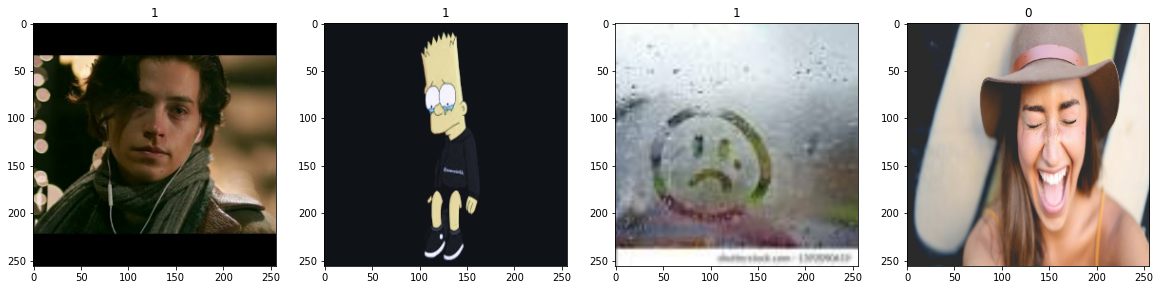

In [16]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### **4.Scale data**

In [17]:
data = data.map(lambda x,y: (x/255, y))
#x are images converted into 0 and 1 by dividing by 255 and y are labels in form 0 amnd 1

In [18]:
data.as_numpy_iterator().next()

(array([[[[0.44978094, 0.4654672 , 0.4767203 ],
          [0.44750306, 0.47103247, 0.47103247],
          [0.45618102, 0.47971043, 0.47971043],
          ...,
          [0.08235294, 0.11764706, 0.14509805],
          [0.07450981, 0.10980392, 0.13725491],
          [0.07596508, 0.11910233, 0.12694547]],
 
         [[0.44560355, 0.45490196, 0.49759498],
          [0.4583793 , 0.4819087 , 0.4819087 ],
          [0.47544423, 0.49897364, 0.49897364],
          ...,
          [0.08235294, 0.11764706, 0.14509805],
          [0.08235294, 0.11764706, 0.14509805],
          [0.07159927, 0.11473652, 0.12257966]],
 
         [[0.45490196, 0.4695772 , 0.49557292],
          [0.4583793 , 0.47798714, 0.5015165 ],
          [0.4627451 , 0.48235294, 0.5058824 ],
          ...,
          [0.08235294, 0.11764706, 0.14509805],
          [0.07406557, 0.10935968, 0.13681066],
          [0.06666667, 0.10980392, 0.13333334]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

### **5. Split Data**

In [19]:
len(data)

10

In [20]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [21]:
test_size

1

In [22]:
val_size

2

In [23]:
train_size #train_size=val_size+test_size

7

In [24]:
train_size+val_size+test_size #this value must be equal to len(data)

10

In [25]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

### **6. Build Deep Learning Model**

In [26]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [28]:
model = Sequential()

In [29]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [30]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

### **7.Train**

In [32]:
logdir='/content/drive/MyDrive/log'

In [33]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [34]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 23s 3s/step - loss: 0.7384 - accuracy: 0.4554 - val_loss: 0.6115 - val_accuracy: 0.7344
Epoch 2/20
7/7 [==============================] - 20s 2s/step - loss: 0.6187 - accuracy: 0.7723 - val_loss: 0.5426 - val_accuracy: 0.8125
Epoch 3/20
7/7 [==============================] - 21s 2s/step - loss: 0.5201 - accuracy: 0.7589 - val_loss: 0.5028 - val_accuracy: 0.7344
Epoch 4/20
7/7 [==============================] - 21s 2s/step - loss: 0.4804 - accuracy: 0.7545 - val_loss: 0.3869 - val_accuracy: 0.9219
Epoch 5/20
7/7 [==============================] - 20s 2s/step - loss: 0.3759 - accuracy: 0.8438 - val_loss: 0.3778 - val_accuracy: 0.7656
Epoch 6/20
7/7 [==============================] - 20s 2s/step - loss: 0.2830 - accuracy: 0.8929 - val_loss: 0.2433 - val_accuracy: 0.9219
Epoch 7/20
7/7 [==============================] - 20s 2s/step - loss: 0.1952 - accuracy: 0.9196 - val_loss: 0.1380 - val_accuracy: 0.9844
Epoch 8/20
7/7 [==================

### **8. Plot Performance**

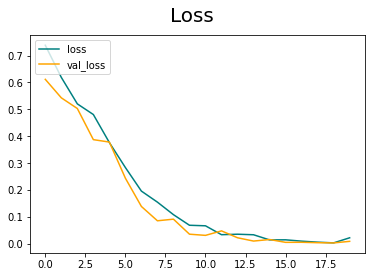

In [50]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

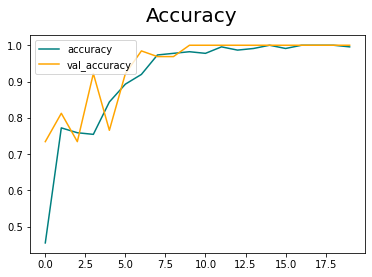

In [51]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### **9. Evaluate**

In [52]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [53]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [54]:
for batch in test.as_numpy_iterator(): 
    x, y = batch
    yhat = model.predict(x)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [55]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


### **10. Test**

In [56]:
import cv2

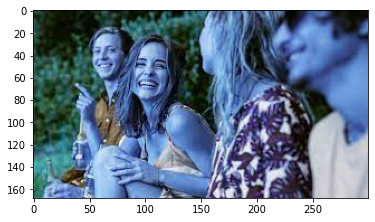

In [85]:
img = cv2.imread('/content/drive/MyDrive/happytest.jpg')
plt.imshow(img)
plt.show()

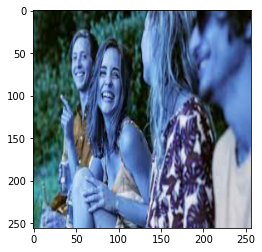

In [86]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [87]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [88]:
yhat

array([[0.44975856]], dtype=float32)

In [89]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


### **11. Save the Model**

In [90]:
from tensorflow.keras.models import load_model

In [91]:
model.save(os.path.join('models','happysad.h5'))

In [93]:
new_model = load_model('/content/models/happysad.h5')

In [94]:
new_model.predict(np.expand_dims(resize/255, 0))

array([[0.44975856]], dtype=float32)